In [1]:
import numpy as np
import scipy as sp
from scipy.integrate import quad, odeint
from scipy.special import eval_legendre
from scipy.sparse import diags
import matplotlib.pyplot as plt

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sturm-Liouville-&amp;-Fourier-Analysis" data-toc-modified-id="Sturm-Liouville-&amp;-Fourier-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sturm-Liouville &amp; Fourier Analysis</a></span></li><li><span><a href="#Motion-of-Three-Spring-Two-Mass-System" data-toc-modified-id="Motion-of-Three-Spring-Two-Mass-System-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Motion of Three Spring Two Mass System</a></span></li><li><span><a href="#Motion-of-the-Double-Pendulum" data-toc-modified-id="Motion-of-the-Double-Pendulum-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Motion of the Double Pendulum</a></span></li><li><span><a href="#N-masses-attached-by-identical-springs-on-a-frictionless-track" data-toc-modified-id="N-masses-attached-by-identical-springs-on-a-frictionless-track-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>N masses attached by identical springs on a frictionless track</a></span></li><li><span><a href="#Ten-masses-attached-by-identical-springs-on-a-frictionless-track" data-toc-modified-id="Ten-masses-attached-by-identical-springs-on-a-frictionless-track-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Ten masses attached by identical springs on a frictionless track</a></span></li></ul></div>

## Sturm-Liouville & Fourier Analysis

Consider the function $g(x) = x e^x - \arccos{x}$. Express $g(x)$ in a series of orthogonal functions as $g(x) = \sum_i a_i f_i(x)$ where the $f_i$'s are: 

(a) Solutions of $\frac{\partial^2}{\partial x^2} f_i(x) + \lambda_i f_i(x) = 0$ where $f_i(x)$ vanishes at both $x = \pm 1$. (Note, these are going to be sines).

(b) Solutions of $(1 - x) \frac{\partial^2}{\partial x^2} f_i(x)-2x  \frac{\partial}{\partial x} f_i(x) + \lambda_i f_i(x)=0$ which are finite at both $x = \pm 1$. (Note, these are going to be Legendre polynomials.) 

Write a program which will calculate the first 10 or so $a_i$'s, and plot $ \sum^{10}_{i=1} a_i f_i(x)$ and $g(x)$ together. The whole goal of this problem is to make you realize that the Fourier analysis actually works. Note that $\omega(x) = 1$ for both cases. 

In [2]:
#Problem 2: Sturm-Liouville
def g(x):
    '''given function'''
    return x * np.exp(x) - np.arccos(x)


def f_c(n, x):
    '''cos function'''
    return np.cos(n * np.pi * x)


def f_s(n, x):
    '''sin functions'''
    return np.sin(n * np.pi * x)


def a_i(g, f_i):
    '''Definition of coefficients (see assignment)'''
    num = quad(lambda x: g(x) * f_i(x), -1, 1)[0]
    dem = quad(lambda x: f_i(x) * f_i(x), -1, 1)[0]
    if abs(dem) < 1e-6:
        dem = 1
    return num / dem


All_ai = []
All_bi = []
for i in range(10):
    '''calculates coefficients for part a)'''
    All_ai.append(a_i(g, lambda x: f_c(i, x)))
    All_bi.append(a_i(g, lambda x: f_s(i, x)))

All_ci = []
for a in range(10):
    '''calculates coefficients for part b)'''
    All_ci.append(a_i(g, lambda x: eval_legendre(a, x)))


def g_approx(x, a_i, f):
    '''Generates approximation function 
    (multplies coefficients and their corresponding f_i's)'''
    gg = np.zeros_like(x)
    for j in range(len(a_i)):
        gg += a_i[j] * f(j, x)
    return gg

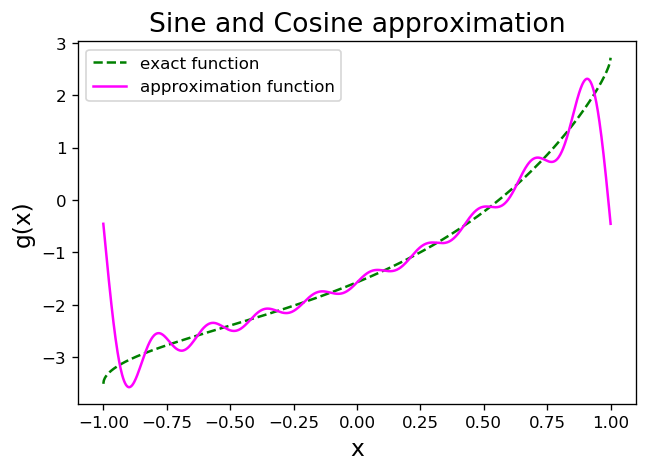

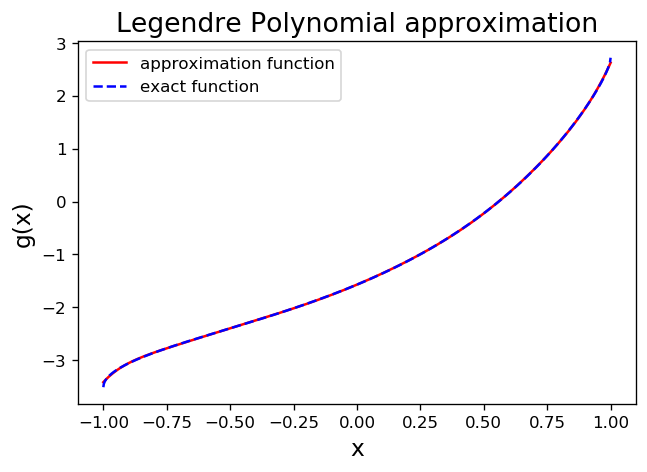

In [3]:
#plots functions
x = np.linspace(-1, 1, 1000)
plt.rcParams['figure.dpi']= 120
plt.figure()
plt.plot(x, g(x), color = 'green', linestyle = '--',label = 'exact function')
plt.plot(x, g_approx(x, All_ai, f_c)+g_approx(x, All_bi, f_s), 
          color = 'magenta', label = 'approximation function')
plt.xlabel('x', fontsize = 14)
plt.ylabel('g(x)', fontsize = 14)
plt.title('Sine and Cosine approximation', fontsize = 16)
plt.legend(loc = 2)
plt.show()

plt.plot(x, g_approx(x, All_ci, eval_legendre), 
         color = 'red', label = 'approximation function')
plt.plot(x, g(x), color = 'blue', linestyle = '--',label = 'exact function')
plt.xlabel('x', fontsize = 14)
plt.ylabel('g(x)', fontsize = 14)
plt.title('Legendre Polynomial approximation', fontsize = 16)
plt.legend(loc = 2)
plt.show()

## Motion of Three Spring Two Mass System

Two masses (each of mass $m$) are constrained to move on the x-axis on a frictionless surface. They are connected to two fixed points and to each other using springs of spring constant $k$. As your coordinates, use $q_1$ and $q_2$ which are 0 at the equilibrium positions.

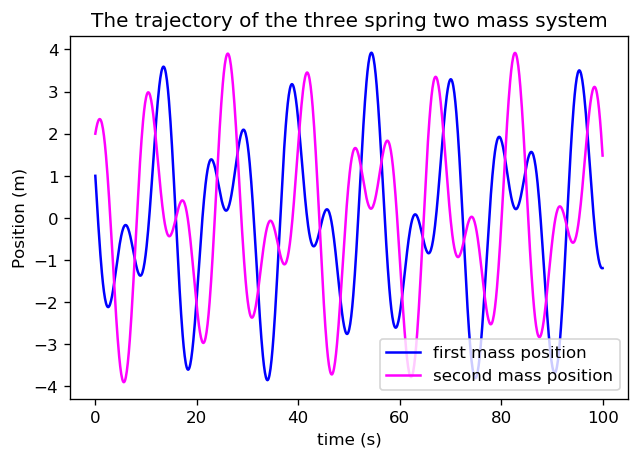

In [4]:
#q1=x, q2=y
k = 2
m = 10  #kg


def mod1(w, t):
    p1, p2, q1, q2 = w
    f = [k * (q2 - 2 * q1), k * (q1 - 2 * q2), p1 / m, p2 / m]
    return f


#initial conditions
w = [1, 2, 0.55, .09]

#time points
t = np.linspace(0, 100, 1000)

#solve ode 1
f = odeint(mod1, w, t)

#plot results
plt.figure(1)
plt.plot(t, f[:, 0], color='blue', label='first mass position')
plt.plot(t, f[:, 1], color='magenta', label='second mass position')
plt.xlabel("time (s)")
plt.ylabel("Position (m)")
plt.title('The trajectory of the three spring two mass system')
plt.legend(loc=4)
plt.show()

## Motion of the Double Pendulum 

Two masses (each m) are in a double pendulum, attached with ropes of length $l$, and constrained to swing in a single plane. As your coordinates, use $\theta_1$ and $\theta_2$ which are 0 when the masses are hanging down.

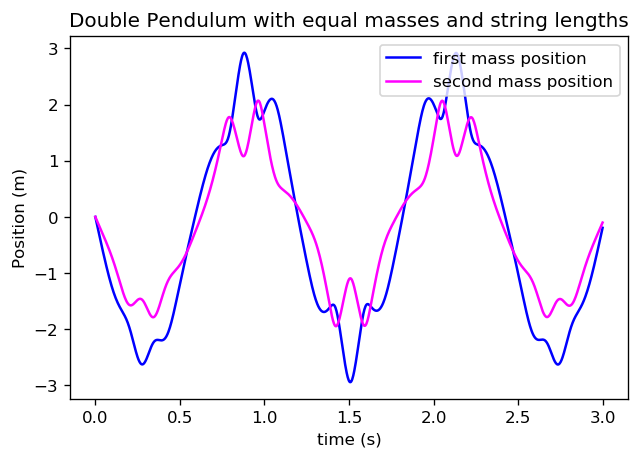

In [5]:
#theta1 = theta, theta2 = phi
l = 0.2  #m
m = 5  #kg
g = 9.81


def mood1(v, t):
    p1, p2, theta, phi = v
    fun = [
        p1 * p2 / (m * l**2) *
        (np.sin(theta - phi) * (np.cos(theta - phi)**2 - 2) -
         2 * np.sin(theta - phi) * np.cos(theta - phi)**2) /
        (np.cos(theta - phi)**2 - 2)**2 - 2 * m * g * l * np.sin(theta),
        p1 * p2 / (m * l**2) *
        (-np.sin(theta - phi) * (np.cos(theta - phi)**2 - 2) +
         2 * np.sin(theta - phi) * np.cos(theta - phi)**2) /
        (np.cos(theta - phi)**2 - 2)**2 - m * g * l * np.sin(phi),
        (p2 * np.cos(theta - phi) - p1) / (m * l**2 *
                                           (np.cos(theta - phi)**2 - 2)),
        (p1 * np.cos(theta - phi) - 2 * p2) / (m * l**2 *
                                               (np.cos(theta - phi)**2 - 2))
    ]
    return fun


#initial conditions
v = [0, 0, np.pi / 4, np.pi / 4]

#time space
time = np.linspace(0, 3, 1000)

#solve ode 1
f2 = odeint(mood1, v, time)

#plot results
plt.plot(time, f2[:, 0], color='blue', label='first mass position')
plt.plot(time, f2[:, 1], color='magenta', label='second mass position')
plt.xlabel("time (s)")
plt.ylabel("Position (m)")
plt.title('Double Pendulum with equal masses and string lengths')
plt.legend(loc=1)
plt.show()

## N masses attached by identical springs on a frictionless track

Consider a large number of gliders, $N$, which are connected by identical springs. Analyze the motion when one glider is displaced from equilibrium by some amount but all the gliders are at rest. Make several time-separated plots of the position of the gliders from equilibrium as a function of equilibrium position. What you should see is something
similar to a traveling pulse.

In [7]:
def build_mat(N, k=1, m=1):
    diag = [
        -2 * k * np.ones(N), k * np.ones(N),
        k * np.array([0] + [1] * (N - 1) + [0]), 1 / m * np.ones(N)
    ]
    M = diags(diag, [-N, -N - 1, -N + 1, N])
    return M


# end def
def odefunc(qs_ps, M):
    return M @ qs_ps


# end def
N = 1000
A = build_mat(N)
t = np.linspace(1, 1000, 10000)
ic = np.zeros(2 * N)
ic[2] = 0.8
data = odeint(lambda x, t: odefunc(x, A), ic, t)

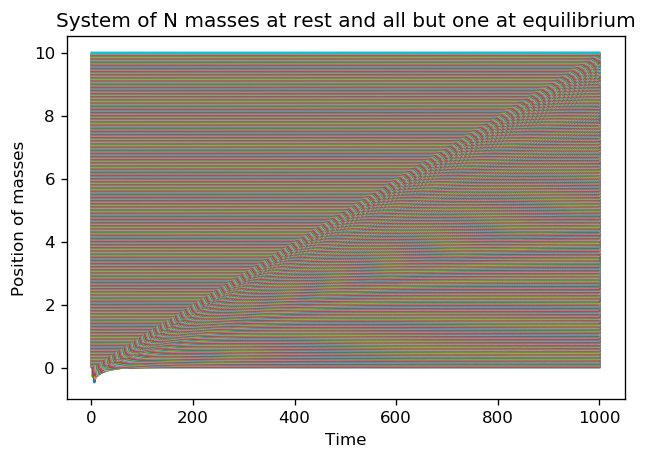

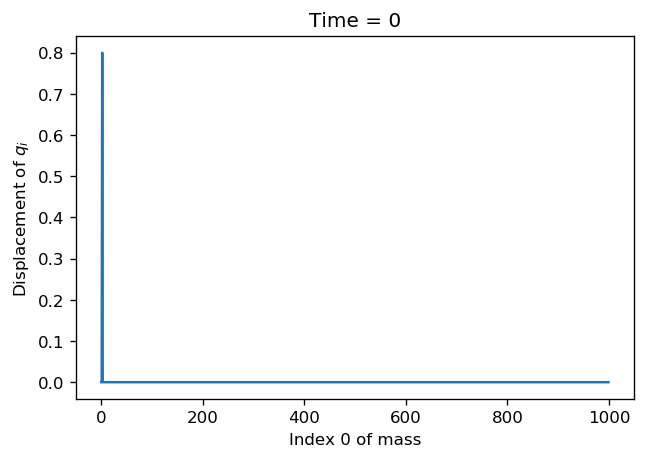

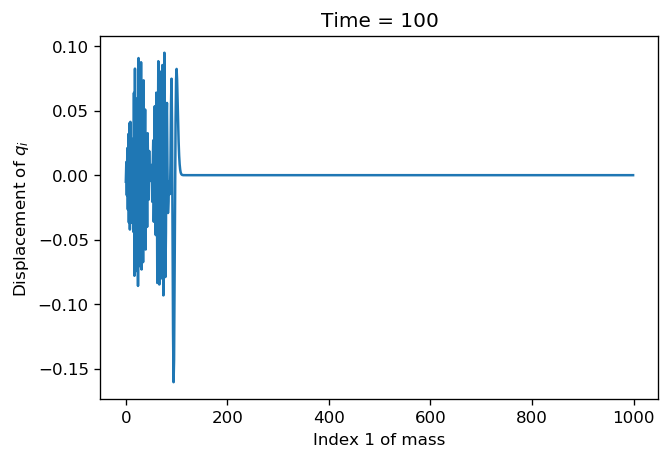

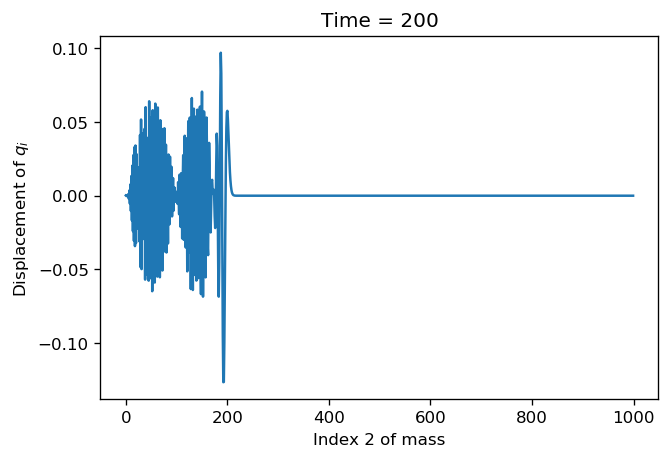

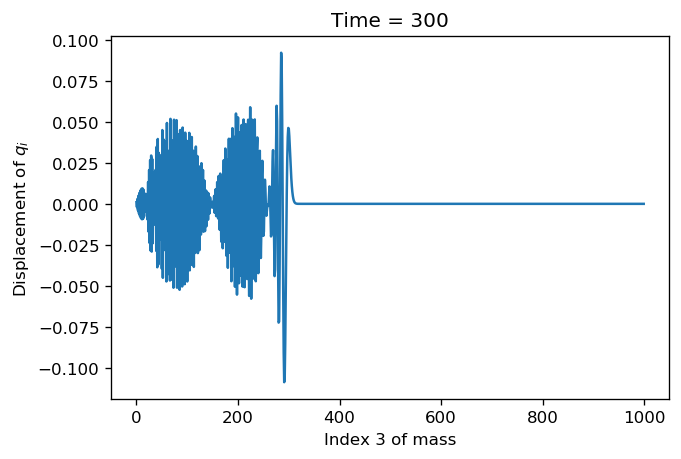

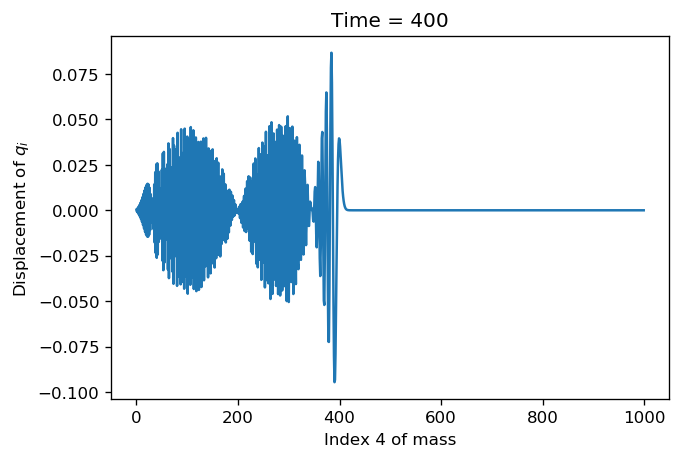

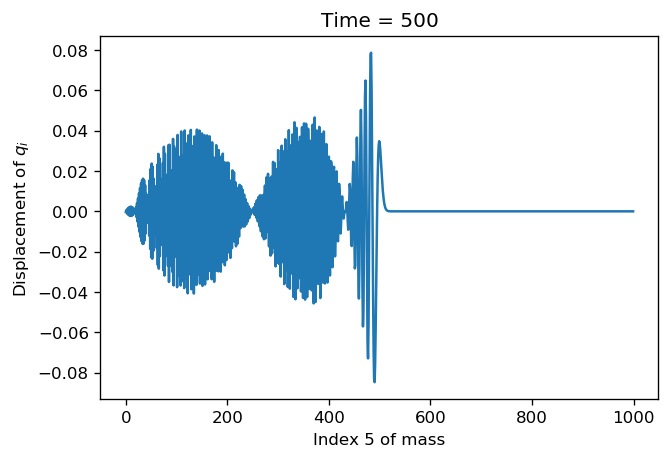

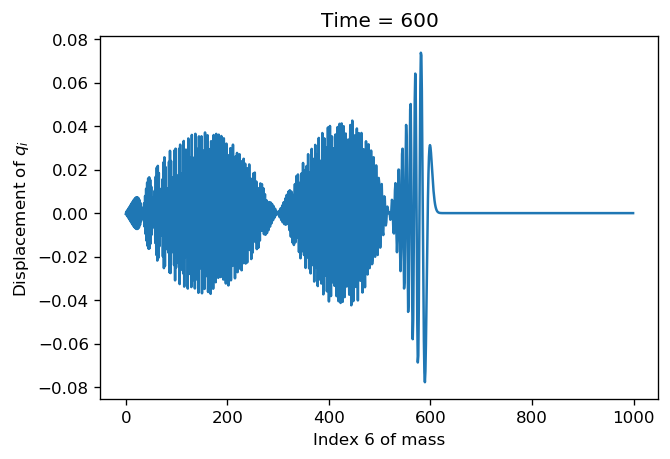

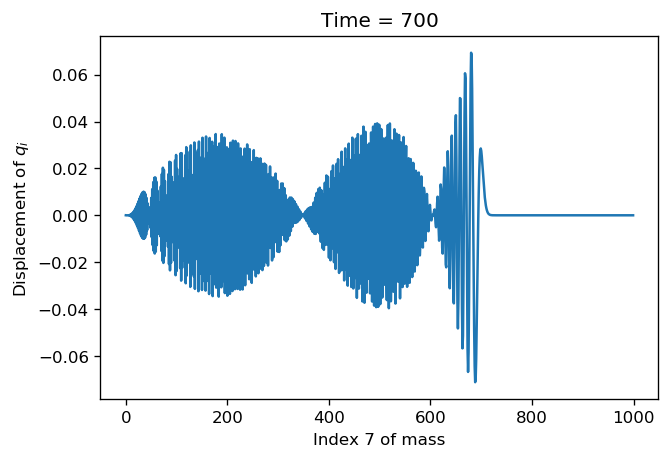

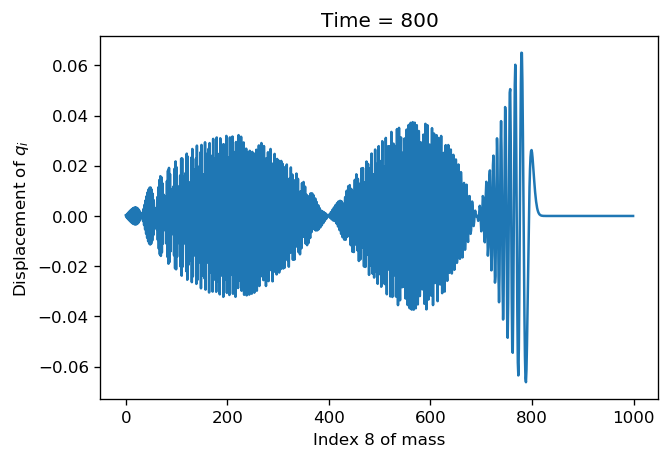

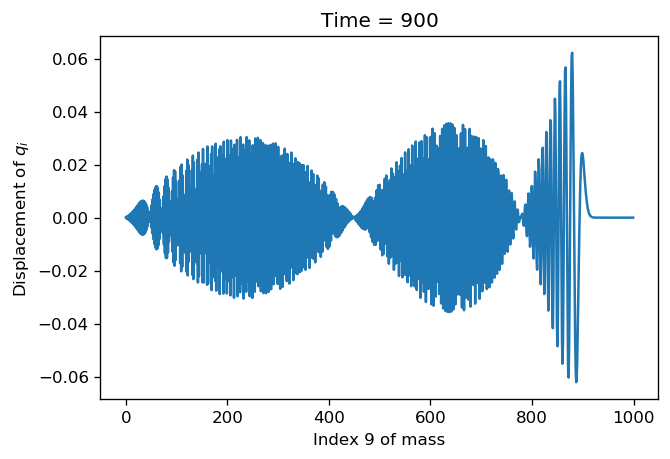

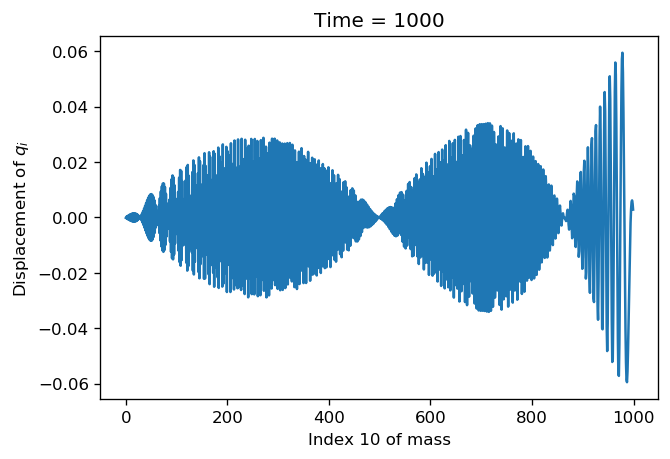

In [8]:
L = 10
plt.figure(1)
for i in range(N):
    plt.plot(t, (data[:, i] + (i + 1) * L / (N + 1)))
plt.title("System of N masses at rest and all but one at equilibrium")
plt.ylabel("Position of masses")
plt.xlabel("Time")
plt.show()

plt.figure(1)
for i in range(11):
    e = -1 if i == 10 else 0
    position = data[i * 1000 + e, :N]
    plt.plot(np.arange(N), position)
    plt.title("Time = " + str(100 * i))
    plt.xlabel("Index " + str(i) + " of mass")
    plt.ylabel('Displacement of $q_i$')
    plt.show()

## Ten masses attached by identical springs on a frictionless track

Consider 10 gliders which are of the same mass and attached to each other by identical springs just like in your lab. Set up the Hamiltonian for it, and determine the equations of motion. Implement the equations of motion with the initial conditions of one of the gliders displaced from its equilibrium by some amount, but all the gliders at rest. Fourier analyze the resulting displacement of one of the gliders to identify the eigen-frequencies.

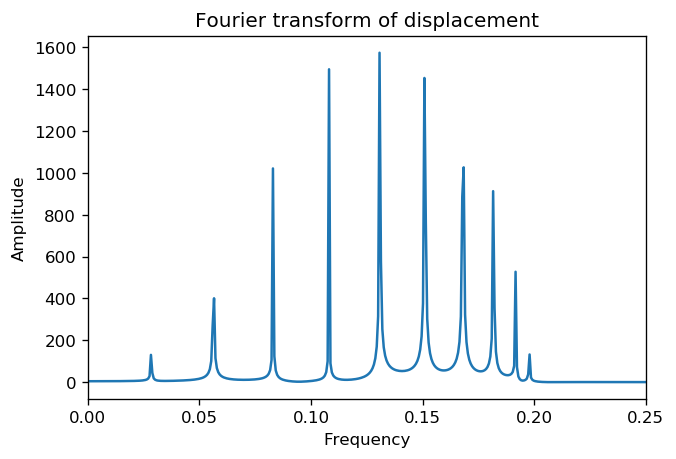

In [9]:
n = 10
B = build_mat(n)
ic = np.zeros(2 * n)
ic[0] = 2
d = odeint(lambda x, t: odefunc(x, B), ic, t)
#print(d)
#d.shape
q_e = d[:, n - 1]

space = np.fft.rfft(q_e)
frequency = 2 * np.pi * np.fft.rfftfreq(t[:].shape[0], 1)
plt.figure(3)
plt.plot(frequency, abs(space))
plt.xlim(0, 0.25)
plt.ylabel("Amplitude")
plt.xlabel("Frequency")
plt.title("Fourier transform of displacement")
plt.show()